In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

from skimage.transform import rotate

from ipywidgets import interact, interactive, fixed, interact_manual, VBox
import ipywidgets as widgets

# you might need to run the following line
# ! jupyter nbextension enable --py --sys-prefix widgetsnbextension


import btriangle_location_detection

In [2]:
b_triangles = []
for file_name in os.listdir("data_from_basel_nanowire/PSB-Examples/"):
    try:
        d = np.loadtxt("data_from_basel_nanowire/PSB-Examples/" + file_name, skiprows=3)
        b_triangles.append(d[:, 1:])
        # plt.figure(figsize=(12,12))
        # plt.imshow(d[:, 1:])
        # plt.show()
    except:
        print(f"did not work for {file_name}")

did not work for log_for_8688.txt
did not work for log_for_8689.txt
did not work for log_for_8767.txt
did not work for log_for_8759.txt
did not work for log_for_8764.txt
did not work for log_for_8760.txt
did not work for log_for_8749.txt
did not work for log_for_20847.txt
did not work for log_for_8754.txt
did not work for log_for_20846.txt
did not work for log_for_8742.txt
did not work for log_for_8687.txt
did not work for log_for_8692.txt
did not work for log_for_8725.txt
did not work for log_for_8690.txt
did not work for log_for_8691.txt
did not work for log_for_8652.txt
did not work for log_for_8901.txt
did not work for log_for_8726.txt
did not work for log_for_8656.txt
did not work for log_for_8737.txt
did not work for log_for_8899.txt


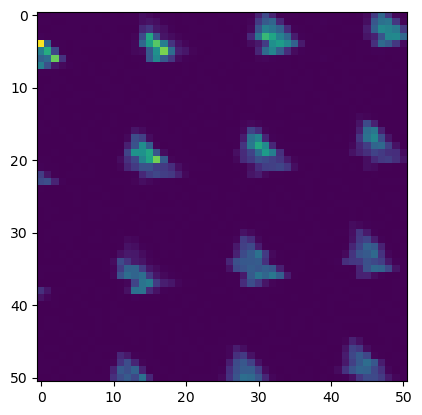

In [3]:
plt.imshow(b_triangles[-11])

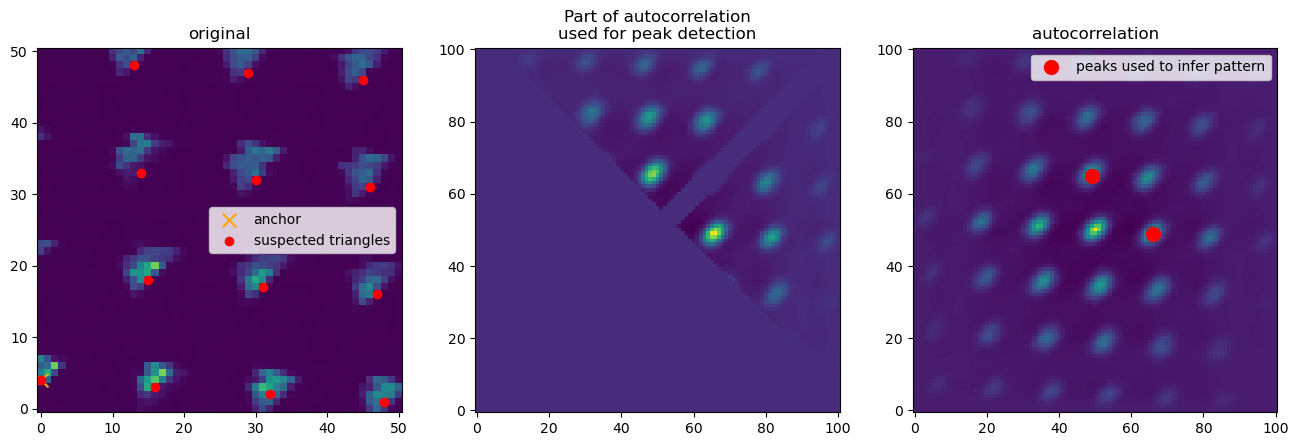

In [4]:
anchor, span_vecs, locations = btriangle_location_detection.get_locations(
    b_triangles[-11], plot=True
)

In [20]:
def plot_autocorr_analysis(
    angle=0, roll_x=0, roll_y=0, crop_x_px=1, crop_y_px=1, skew_x=0, skew_y=0, k=5
):
    img = b_triangles[-11]

    img = np.roll(img, roll_y)
    img = np.roll(img, roll_x, axis=0)

    # skewing
    h, l = img.shape
    dl = skew_y
    b = np.zeros((h, l + dl), dtype=img.dtype)
    for y in range(h):
        dec = (dl * (h - y)) // h
        b[y, dec : dec + l] = img[y, :]
    img = b

    # skewing other axis
    img = np.rot90(img)
    h, l = img.shape
    dl = skew_x
    b = np.zeros((h, l + dl), dtype=img.dtype)
    for y in range(h):
        dec = (dl * (h - y)) // h
        b[y, dec : dec + l] = img[y, :]
    img = b
    img = np.rot90(img, 3)

    img = rotate(img, angle)[crop_x_px:-crop_x_px, crop_y_px:-crop_y_px]

    anchor, peaks, all_triangles = btriangle_location_detection.get_locations(
        img, offset_px=k
    )
    auto_corr_img = btriangle_location_detection.autocorrelation(img)
    offset_px = (
        k // 2
    )  # The offset is taken in two directions so we need to half it here

    upper = btriangle_location_detection.origin_tril(
        btriangle_location_detection.origin_tril_antidiagonal(
            auto_corr_img, img.shape, offset_px
        ),
        img.shape,
        offset_px,
    )
    lower = btriangle_location_detection.origin_triu(
        btriangle_location_detection.origin_tril_antidiagonal(
            auto_corr_img, img.shape, offset_px
        ),
        img.shape,
        offset_px,
    )

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6))
    ax1.imshow(img, origin="lower")

    ax1.scatter(anchor[1], anchor[0], marker="x", c="orange", s=100, label="anchor")
    ax1.scatter(
        all_triangles[:, 1],
        all_triangles[:, 0],
        c="red",
        label="suspected triangles",
    )
    ax1.set_title("original")
    ax1.legend()
    ax2.imshow(lower + upper, origin="lower")
    ax2.set_title("Part of autocorrelation\nused for peak detection")
    ax3.imshow(auto_corr_img, origin="lower")
    peaks += np.array(auto_corr_img.shape) // 2
    peak1, peak2 = peaks
    ax3.scatter(peak1[1], peak1[0], c="red", s=100, label="peaks used to infer pattern")
    ax3.scatter(peak2[1], peak2[0], c="red", s=100)
    peaks -= np.array(auto_corr_img.shape) // 2
    peak1, peak2 = peaks
    ax3.set_title(f"autocorrelation")
    ax3.legend()

    return ()


ip = interact(
    plot_autocorr_analysis,
    angle=(-30, 30, 1),
    roll_x=(-20, 20, 1),
    roll_y=(-20, 20, 1),
    crop_x_px=(1, 40, 1),
    crop_y_px=(1, 40, 1),
    skew_x=(0, 40, 1),
    skew_y=(0, 40, 1),
    k=(0, 20, 1),
)

interactive(children=(IntSlider(value=0, description='angle', max=30, min=-30), IntSlider(value=0, description…